In [31]:
import pandas as pd
df = pd.read_csv("EURUSD_Candlestick_5_M_ASK_30.09.2019-30.09.2022.csv")
df = df.loc[:10000]

# Long Positions Volatility Related Labeling

In [32]:
import pandas_ta as ta
def atr_label_threshold_long(df, bars):
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'])

    ratio = 1
    slcoef = 1
    tpcoef = ratio*slcoef

    lower_threshold_long = df['Close'] - df['ATR']*slcoef
    upper_threshold_long = df['Close'] + df['ATR']*tpcoef

    df = df.reset_index(drop=True)

    df['Label_Long'] = 0
    for i in range(len(df) - bars):   
       
        # Check if any future Close prices are above the upper threshold at the current index
        condition_1 = (df['Close'][i + 1:i + bars + 1] > upper_threshold_long.iloc[i]).any()
        # Ensure none of the future Close prices are below the lower threshold at the current index
        condition_2 = (df['Close'][i + 1:i + bars + 1] > lower_threshold_long.iloc[i]).all()

        # Set label based on conditions
        if condition_1 and condition_2:
            df.loc[i, 'Label_Long'] = 1

    return df

In [33]:
df = atr_label_threshold_long(df, 10)

In [34]:
import numpy as np
def pointpos(x, col):
    if x[col]==1:
        return x['Low']-1e-3
    elif x[col]==-1:
        return x['High']+1e-3
    else:
        return np.nan

# Short Positions Volatility Related Labeling

In [35]:
def atr_label_threshold_short(df, bars):
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'])

    ratio = 1
    slcoef = 1
    tpcoef = ratio*slcoef

    lower_threshold_short = df['Close'] - df['ATR']*tpcoef
    upper_threshold_short = df['Close'] + df['ATR']*slcoef

    df = df.reset_index(drop=True)

    # conditions for a short position where we're 
    # looking for the price to drop below a lower 
    # threshold without crossing an upper threshold in the future.

    df['Label_Short'] = 0
    for i in range(len(df) - bars):
        
        # Check if any future Close prices are below the lower threshold at the current index
        condition_1 = (df['Close'][i + 1:i + bars + 1] < lower_threshold_short.iloc[i]).any()
        
        # Ensure none of the future Close prices are above the upper threshold at the current index
        condition_2 = (df['Close'][i + 1:i + bars + 1] < upper_threshold_short.iloc[i]).all()
        
        # Set label based on conditions
        if condition_1 and condition_2:
            df.loc[i, 'Label_Short'] = -1

    return df

In [36]:
df = atr_label_threshold_short(df, 10)

In [37]:
df["Label"] = df["Label_Long"] + df["Label_Short"]
df[df["Label"]!=0]

,Gmt time,Open,High,Low,Close,Volume,ATR,Label_Long,Label_Short,Label
14,30.09.2019 01:10:00.000,1.09324,1.09329,1.09309,1.09314,479.66,0.000189,1,0,1
15,30.09.2019 01:15:00.000,1.09313,1.09329,1.09312,1.09329,372.92,0.000187,1,0,1
16,30.09.2019 01:20:00.000,1.09329,1.09335,1.09323,1.09325,318.09,0.000180,1,0,1
17,30.09.2019 01:25:00.000,1.09324,1.09332,1.09320,1.09330,302.55,0.000174,1,0,1
23,30.09.2019 01:55:00.000,1.09345,1.09349,1.09339,1.09344,229.62,0.000160,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...
9986,15.11.2019 17:10:00.000,1.10451,1.10461,1.10446,1.10454,345.52,0.000219,1,0,1
9987,15.11.2019 17:15:00.000,1.10454,1.10483,1.10454,1.10483,360.78,0.000224,1,0,1
9988,15.11.2019 17:20:00.000,1.10483,1.10501,1.10478,1.10498,443.35,0.000225,1,0,1
9989,15.11.2019 17:25:00.000,1.10497,1.10512,1.10488,1.10508,525.94,0.000226,1,0,1


In [38]:
df['pointpos'] = df.apply(lambda row: pointpos(row,"Label"), axis=1)

In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=100
dfpl = df[st:st+350]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

fig.show()

# ema and ema Slope

In [40]:
df["ema30"] = ta.ema(df['Close'], length=30)
df

,Gmt time,Open,High,Low,Close,Volume,ATR,Label_Long,Label_Short,Label,pointpos,ema30
0,30.09.2019 00:00:00.000,1.09425,1.09426,1.09405,1.09406,585.10,NaN,0,0,0,NaN,NaN
1,30.09.2019 00:05:00.000,1.09408,1.09414,1.09401,1.09409,289.39,NaN,0,0,0,NaN,NaN
2,30.09.2019 00:10:00.000,1.09410,1.09423,1.09408,1.09410,276.24,NaN,0,0,0,NaN,NaN
3,30.09.2019 00:15:00.000,1.09409,1.09410,1.09388,1.09389,439.29,NaN,0,0,0,NaN,NaN
4,30.09.2019 00:20:00.000,1.09390,1.09395,1.09388,1.09395,341.23,NaN,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15.11.2019 18:00:00.000,1.10540,1.10542,1.10509,1.10532,483.79,0.000227,0,0,0,NaN,1.104891
9997,15.11.2019 18:05:00.000,1.10533,1.10535,1.10520,1.10530,238.49,0.000222,0,0,0,NaN,1.104917
9998,15.11.2019 18:10:00.000,1.10530,1.10542,1.10529,1.10537,298.48,0.000215,0,0,0,NaN,1.104946
9999,15.11.2019 18:15:00.000,1.10537,1.10540,1.10525,1.10538,255.19,0.000210,0,0,0,NaN,1.104974


In [41]:
from scipy.stats import linregress

def compute_slope(window):
    # Use only the last 5 values of the window
    if len(window) < 5:
        return np.nan  # Not enough data to compute the slope
    y = window[-5:]
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope

# Apply the function to compute the slope of ema20
df['ema30_Slope'] = df['ema30'].rolling(window=5, min_periods=5).apply(compute_slope, raw=True)

# 3 Moving Averages

In [42]:
df['ema50'] = ta.ema(df['Close'], length=50)
df['ema100'] = ta.ema(df['Close'], length=100)

In [43]:
def ema_positions(row):
    if row['ema30'] > row['ema50'] > row['ema100']:
        return 1
    elif row['ema30'] < row['ema50'] < row['ema100']:
        return -1
    else:
        return 0

In [44]:
df['ema_Positions'] = df.apply(ema_positions, axis=1)

# Moving Average Distance

In [45]:
def compute_distance(row):
    # Determine the closest point to EMA20 (either Open or Close)
    closest_point = min(row['Open'], row['Close'], key=lambda x: abs(x - row['ema30']))
    # Compute the absolute distance between the closest point and EMA20
    distance = row['ema30'] - closest_point
    return distance

In [46]:
df['Distance_to_ema30'] = df.apply(compute_distance, axis=1)

# Previously Tested Indicators

In [47]:
df['RSI']=ta.rsi(df.Close, length=10)
my_bbands = ta.bbands(df.Close, length=15, std=1.5)
df=df.join(my_bbands)

In [48]:
def ema_signal(df, current_candle, backcandles):
    df_slice = df.reset_index().copy()
    # Get the range of candles to consider
    start = max(0, current_candle - backcandles)
    end = current_candle
    relevant_rows = df_slice.iloc[start:end]

    # Check if all EMA_fast values are below EMA_slow values
    if all(relevant_rows["ema30"] < relevant_rows["ema50"]):
        return 1
    elif all(relevant_rows["ema30"] > relevant_rows["ema50"]):
        return 2
    else:
        return 0

def BB_signal(df, current_candle, backcandles):
    candle_open_price = df.Open[current_candle]
    bbl = df['BBL_15_1.5'][current_candle]
    bbu = df['BBU_15_1.5'][current_candle]

    if (candle_open_price<=bbl): #and df.RSI[current_candle]>45
            return 2
    if (candle_open_price>=bbu): #and df.RSI[current_candle]<65
            return 1
    return 0

def total_signal(df, current_candle, backcandles):
    ema_signal_result = ema_signal(df, current_candle, backcandles)
    candle_open_price = df.Open[current_candle]
    bbl = df['BBL_15_1.5'][current_candle]
    bbu = df['BBU_15_1.5'][current_candle]

    if (ema_signal_result==2 and candle_open_price<=bbl): #and df.RSI[current_candle]<60
            return 2
    if (ema_signal_result==1 and candle_open_price>=bbu): #and df.RSI[current_candle]>40
            return 1
    return 0

In [49]:
# Apply the EMA signal function and save the result in a new column
df['ema_signal'] = [ema_signal(df, i, backcandles=7) for i in range(len(df))]

# Apply the BB signal function and save the result in a new column
df['BB_signal'] = [BB_signal(df, i, backcandles=7) for i in range(len(df))]

# Apply the total signal function and save the result in a new column
df['total_signal'] = [total_signal(df, i, backcandles=7) for i in range(len(df))]

In [50]:
analyze_col = ["Volume", "ATR", "ema30_Slope", "Distance_to_ema30", 'ema_Positions', "RSI", "ema_signal", "BB_signal", "total_signal", "Label_Long"]
df=df[analyze_col]
# df.columns
df

,Volume,ATR,ema30_Slope,Distance_to_ema30,ema_Positions,RSI,ema_signal,BB_signal,total_signal,Label_Long
0,585.10,NaN,NaN,NaN,0,NaN,1,0,0,0
1,289.39,NaN,NaN,NaN,0,NaN,0,0,0,0
2,276.24,NaN,NaN,NaN,0,NaN,0,0,0,0
3,439.29,NaN,NaN,NaN,0,NaN,0,0,0,0
4,341.23,NaN,NaN,NaN,0,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9996,483.79,0.000227,0.000028,-0.000429,1,66.257520,2,0,0,0
9997,238.49,0.000222,0.000029,-0.000383,1,64.899370,2,0,0,0
9998,298.48,0.000215,0.000030,-0.000354,1,67.490828,2,0,0,0
9999,255.19,0.000210,0.000028,-0.000396,1,67.867388,2,0,0,0


# Data Preprocessing No Data Leakage

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns


# Drop NA values
df_analysis = df.copy().dropna()

# Define features and label
X = df_analysis.drop(['Label_Long'], axis=1)
y = df_analysis['Label_Long']

# Split the dataset into training and testing sets sequentially
split_ratio = 0.9
split_point = int(len(df_analysis) * split_ratio)
X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

# One-Hot Encoding
columns_to_encode = ["ema_Positions", 'ema_signal', 'BB_signal', 'total_signal']
# Generate one-hot encoded variables for both training and testing datasets directly
X_train_encoded = pd.get_dummies(X_train[columns_to_encode], columns=columns_to_encode, prefix=columns_to_encode)
X_test_encoded = pd.get_dummies(X_test[columns_to_encode], columns=columns_to_encode, prefix=columns_to_encode)

# Align the columns of the encoded DataFrames to ensure they have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Apply Polynomial Features and Standardization to numeric features
# Assuming all other features are numeric and need transformation
# poly = PolynomialFeatures(degree=3)
# X_train_poly = poly.fit_transform(X_train.drop(columns=columns_to_encode))
# X_test_poly = poly.transform(X_test.drop(columns=columns_to_encode))

X_train_poly = X_train.drop(columns=columns_to_encode)
X_test_poly = X_test.drop(columns=columns_to_encode)
feature_names = X_train.drop(columns=columns_to_encode).columns

# Standardization
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Get feature names for polynomial features
#feature_names = poly.get_feature_names_out(X_train.drop(columns=columns_to_encode).columns)

# Convert to DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly_scaled, columns=feature_names, index=X_train.index)
X_test_poly_df = pd.DataFrame(X_test_poly_scaled, columns=feature_names, index=X_test.index)

# Join the polynomial features with the encoded features
X_train_final = X_train_poly_df.join(X_train_encoded)
X_test_final = X_test_poly_df.join(X_test_encoded)

# # Apply PCA
# pca = PCA(n_components=3)
# X_train_pca = pca.fit_transform(X_train_final)
# X_test_pca = pca.transform(X_test_final)

# # # Creating DataFrame for PCA components
# columns_pca = ['PC1', 'PC2', "PC3"]
# X_train_pca_df = pd.DataFrame(data=X_train_pca, columns=columns_pca, index=X_train.index)
# X_test_pca_df = pd.DataFrame(data=X_test_pca, columns=columns_pca, index=X_test.index)

# If PCA is not applied, use the final pre-PCA DataFrames for further processing or modeling
X_train_pca_df = X_train_final
X_test_pca_df = X_test_final


In [52]:
X_train_pca_df

,Volume,ATR,ema30_Slope,Distance_to_ema30,RSI,ema_Positions_-1,ema_Positions_0,ema_Positions_1,ema_signal_0,ema_signal_1,ema_signal_2,BB_signal_0,BB_signal_1,BB_signal_2,total_signal_0,total_signal_1,total_signal_2
33,-0.414486,-1.002551,-0.439329,0.397665,-1.710305,False,True,False,True,False,False,True,False,False,True,False,False
34,-0.554989,-0.946167,-0.627496,0.758035,-2.280342,False,True,False,True,False,False,False,False,True,True,False,False
35,-0.685633,-0.981383,-0.789631,1.031961,-1.928310,False,True,False,True,False,False,False,False,True,True,False,False
36,-0.570910,-0.979135,-0.853984,0.738427,-1.133000,False,True,False,True,False,False,False,False,True,True,False,False
37,-0.603639,-0.994258,-0.781219,0.624186,-0.914295,False,True,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999,-0.459855,-0.897898,0.045025,0.008506,-0.344338,False,False,True,False,False,True,True,False,False,True,False,False
9000,-0.215813,-0.869608,-0.011655,0.060634,-0.123805,False,False,True,False,False,True,True,False,False,True,False,False
9001,-0.087044,-0.848699,-0.030940,0.081753,-0.331781,False,False,True,False,False,True,True,False,False,True,False,False
9002,-0.338327,-0.877524,-0.058905,0.075441,-0.437731,False,False,True,False,False,True,True,False,False,True,False,False


# Training Machine Learning Model

### Random Forests

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca_df, y_train)
# Predicting the test set results
#y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test_pca_df)[:, 1]  # Get probabilities for the positive class

threshold = 0.75  # Customize this value
y_pred = (y_pred_proba >= threshold).astype(int)

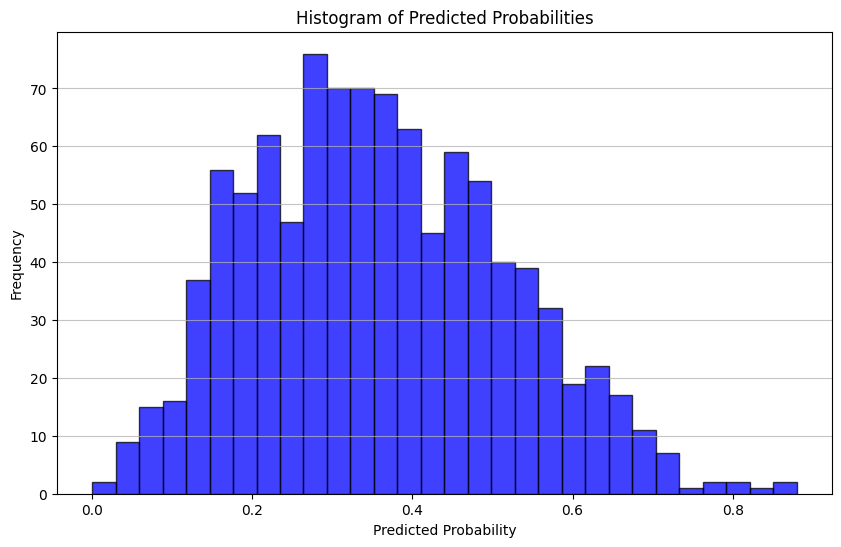

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### XGBoost

In [56]:
import xgboost as xgb

clf = xgb.XGBClassifier(eval_metric='logloss', random_state=30)
clf.fit(X_train_pca_df, y_train)
# Predicting the test set results
#y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test_pca_df)[:, 1]  # Get probabilities for the positive class

threshold = 0.8  # Customize this value
y_pred = (y_pred_proba >= threshold).astype(int)

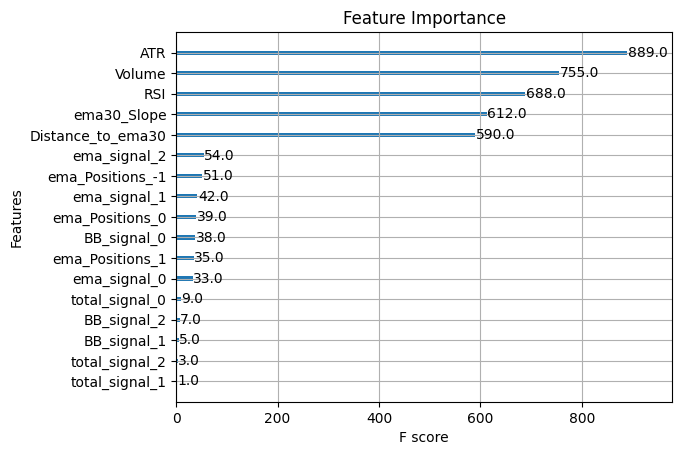

In [57]:
# Plot feature importance
xgb.plot_importance(clf, importance_type='weight')
plt.title('Feature Importance')
plt.show()

### Neural Networks Classifier

In [59]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 50), activation='relu', solver='adam', max_iter=5000, random_state=42)
clf.fit(X_train_pca_df, y_train)
y_pred_proba = clf.predict_proba(X_test_pca_df)[:, 1]

In [60]:
threshold = 0.3 # Customize this value
y_pred = (y_pred_proba >= threshold).astype(int)

### Evaluating Classifiers

Accuracy Score: 0.5727181544633901
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       598
           1       0.46      0.37      0.41       399

    accuracy                           0.57       997
   macro avg       0.54      0.54      0.54       997
weighted avg       0.56      0.57      0.56       997



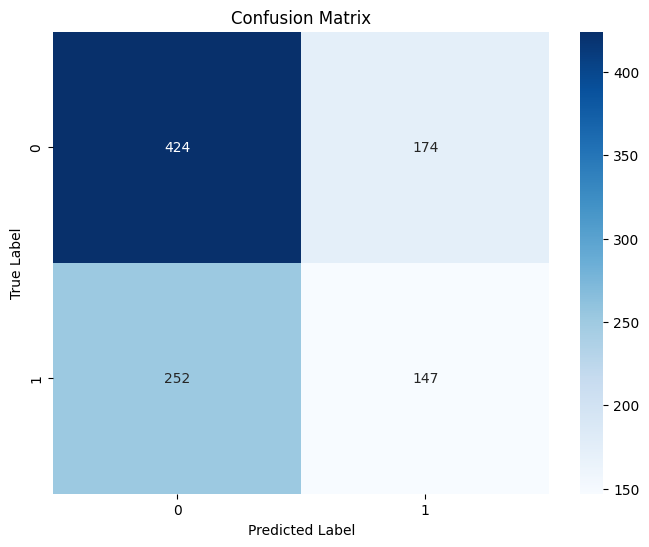

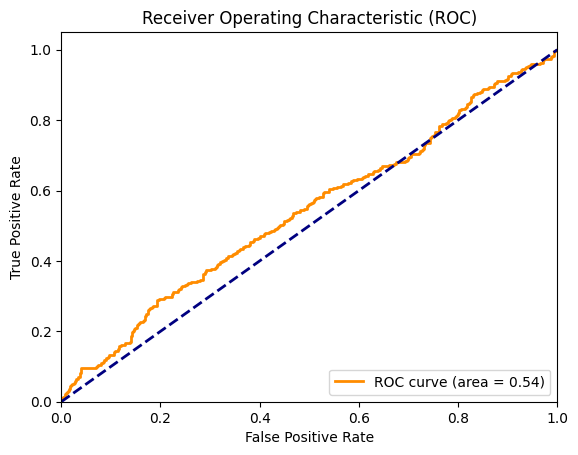

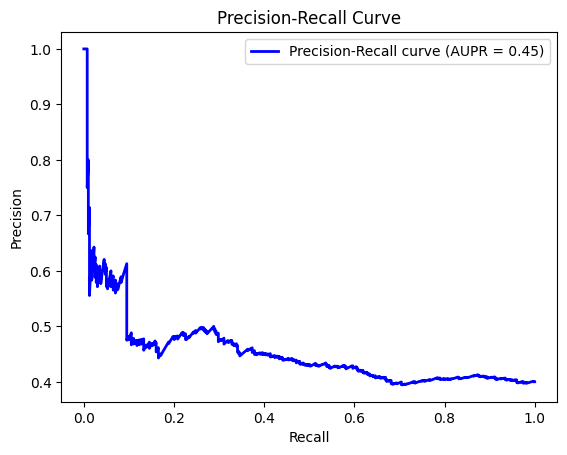

In [61]:
# Evaluating the classifier
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve and AUPR
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
aupr = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUPR = %0.2f)' % aupr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()
